In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [6]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [8]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [15]:
g = round(df['salary'].mean(),2)

g

288655.41

In [18]:
df['salary'] =df['salary'].fillna(g)

In [36]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

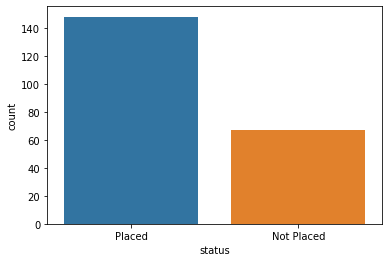

In [37]:
sns.countplot(x='status', data = df, hue = None)

In [42]:
workexp = pd.get_dummies(df['workex'])

In [43]:
workexp

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
210,1,0
211,1,0
212,0,1
213,1,0


In [46]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.00
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.00
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.00
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.41
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.00


In [149]:
x = df.drop(['sl_no','gender','ssc_b','hsc_b','hsc_s','degree_t','degree_p','specialisation'], axis=1)

In [150]:
x

,ssc_p,hsc_p,workex,etest_p,mba_p,status,salary
0,67.00,91.00,No,55.0,58.80,Placed,270000.00
1,79.33,78.33,Yes,86.5,66.28,Placed,200000.00
2,65.00,68.00,No,75.0,57.80,Placed,250000.00
3,56.00,52.00,No,66.0,59.43,Not Placed,288655.41
4,85.80,73.60,No,96.8,55.50,Placed,425000.00
...,...,...,...,...,...,...,...
210,80.60,82.00,No,91.0,74.49,Placed,400000.00
211,58.00,60.00,No,74.0,53.62,Placed,275000.00
212,67.00,67.00,Yes,59.0,69.72,Placed,295000.00
213,74.00,66.00,No,70.0,60.23,Placed,204000.00


In [151]:
wea = pd.get_dummies(df['workex'])

In [152]:
x = pd.concat([x, wea], axis =1)

In [153]:
x= x.drop(['workex'], axis =1)

In [154]:
x

,ssc_p,hsc_p,etest_p,mba_p,status,salary,No,Yes
0,67.00,91.00,55.0,58.80,Placed,270000.00,1,0
1,79.33,78.33,86.5,66.28,Placed,200000.00,0,1
2,65.00,68.00,75.0,57.80,Placed,250000.00,1,0
3,56.00,52.00,66.0,59.43,Not Placed,288655.41,1,0
4,85.80,73.60,96.8,55.50,Placed,425000.00,1,0
...,...,...,...,...,...,...,...,...
210,80.60,82.00,91.0,74.49,Placed,400000.00,1,0
211,58.00,60.00,74.0,53.62,Placed,275000.00,1,0
212,67.00,67.00,59.0,69.72,Placed,295000.00,0,1
213,74.00,66.00,70.0,60.23,Placed,204000.00,1,0


In [155]:
sta = pd.get_dummies(x['status'])

In [156]:
x = pd.concat([x,sta], axis=1)

In [162]:
x

,ssc_p,hsc_p,etest_p,mba_p,status,salary,No,Yes
0,67.00,91.00,55.0,58.80,Placed,270000.00,1,0
1,79.33,78.33,86.5,66.28,Placed,200000.00,0,1
2,65.00,68.00,75.0,57.80,Placed,250000.00,1,0
3,56.00,52.00,66.0,59.43,Not Placed,288655.41,1,0
4,85.80,73.60,96.8,55.50,Placed,425000.00,1,0
...,...,...,...,...,...,...,...,...
210,80.60,82.00,91.0,74.49,Placed,400000.00,1,0
211,58.00,60.00,74.0,53.62,Placed,275000.00,1,0
212,67.00,67.00,59.0,69.72,Placed,295000.00,0,1
213,74.00,66.00,70.0,60.23,Placed,204000.00,1,0


In [171]:
x.drop(['status'], axis =1)

,ssc_p,hsc_p,etest_p,mba_p,salary,No,Yes
0,67.00,91.00,55.0,58.80,270000.00,1,0
1,79.33,78.33,86.5,66.28,200000.00,0,1
2,65.00,68.00,75.0,57.80,250000.00,1,0
3,56.00,52.00,66.0,59.43,288655.41,1,0
4,85.80,73.60,96.8,55.50,425000.00,1,0
...,...,...,...,...,...,...,...
210,80.60,82.00,91.0,74.49,400000.00,1,0
211,58.00,60.00,74.0,53.62,275000.00,1,0
212,67.00,67.00,59.0,69.72,295000.00,0,1
213,74.00,66.00,70.0,60.23,204000.00,1,0


In [174]:
y = x['status']

In [175]:
y

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [188]:
x =x.drop(['status'], axis =1)

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=1, test_size = 0.3)

In [190]:
print((x_train.shape,
       x_test.shape,y_train.shape,y_test.shape))

((150, 7), (65, 7), (150,), (65,))


In [191]:
from sklearn.naive_bayes import GaussianNB

In [192]:
model = GaussianNB()

In [193]:
model.fit(x_train,y_train)

GaussianNB()

In [194]:
y_pred = model.predict(x_test)

In [199]:
df1 = pd.DataFrame({'Actuallly_pred': y_test,'predicted_vallues': y_pred})

In [201]:
df1

,Actuallly_pred,predicted_vallues
108,Placed,Placed
207,Placed,Placed
106,Not Placed,Not Placed
107,Placed,Placed
51,Not Placed,Not Placed
...,...,...
114,Placed,Placed
127,Placed,Placed
116,Placed,Placed
117,Placed,Placed


In [207]:
print('accuracy_score', accuracy_score(y_test,y_pred) )

accuracy_score 1.0


In [208]:
print('Classification', classification_report(y_test,y_pred))

Classification               precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        20
      Placed       1.00      1.00      1.00        45

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [210]:
print(confusion_matrix(y_test,y_pred))

[[20  0]
 [ 0 45]]
